<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jihidalgor/blob/main/A01794221_ActividadSemanal7_Regresion_y_Kmeans_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TC4029 - Ciencia y analítica de datos.**

**Actividad Semanal 7 - Regresión y Kmeans.**

***Notebook 2.***



Alumno: Jorge Iván Hidalgo Reyes.

*Matrícula: A01794221.*


Profesora: María de la Paz Rico Fernández.

Fecha: Noviembre 09, 2022.

Este notebook se basa en información de target.

![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 7.5 MB/s 
     |████████████████████████████████| 1.0 MB 49.7 MB/s 
     |████████████████████████████████| 1.7 MB 42.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 52.5 MB/s 
     |████████████████████████████████| 6.3 MB 37.4 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=7a551a81ce9c3e670fcd39db85cc4561583f97b3da9a9a870d0beb5c059e7d56
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=f16957aa8972b8af2e9ebe1dfe5dcf2a8ead8bd658e80e7fc8338b3f15ac17de
  Stored in directory: /root/.

In [2]:
%matplotlib inline

import qeds
import geopandas
import numpy as np
import pandas as pd
from tqdm import tqdm
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


Importa la base de datos

In [3]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [4]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud.**

* **Latitud:** 
 * Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). 
 * La latitud puede ser norte y sur.

* **Longitud**: 
 * Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).
 * La longitud puede ser este y oeste.

In [6]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

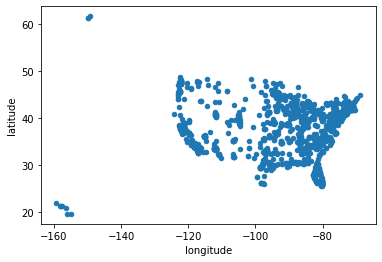

In [7]:
latlong.plot.scatter( "longitude","latitude")

In [8]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [9]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [10]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


**Mapa.**

In [11]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


**Gráfica del mapa.**

In [12]:
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

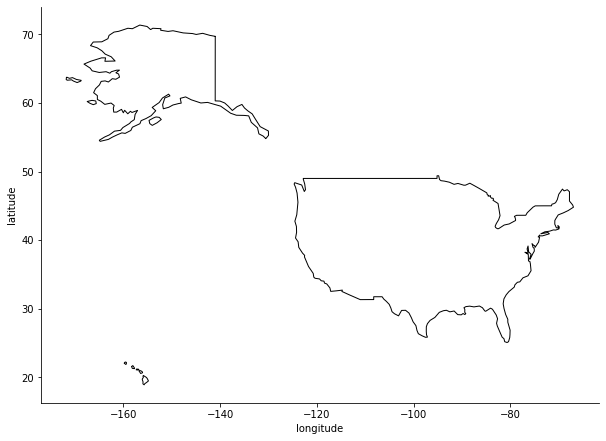

In [13]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

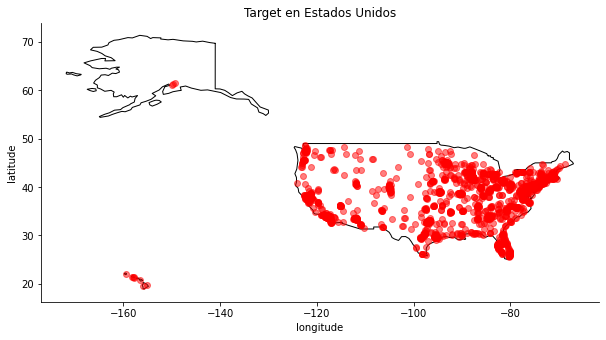

In [14]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿Qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

**Encuentra el numero ideal de almacenes, justifica tu respuesta:**

# Punto 1.

¿Cómo elegiste el número de almacenes?

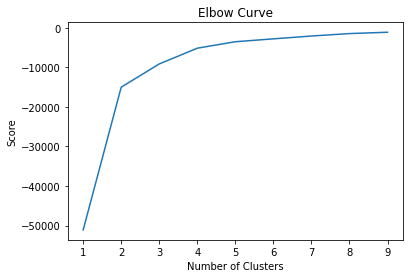

In [15]:
from sklearn.cluster import KMeans

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = latlong[['latitude']]
X_axis = latlong[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


Empelando el método del codo (Elbow method).

Este método se utiliza para determinar el número óptimo de clusters en una agrupación K-means. Con este método se traza el valor de la función costo para varios valores de $k$. 

La forma en que trabaja este método es el siguiente: conforme se incrementa el valor de $k$, el porcentaje de la distorsión media de los datos disminuirá. Es decir, cada cluster tendrá menos instancias constituyentes, y dichas instancias estarán más cerca de sus respectivos centroides. 

El valor de K en el que la mejora en la distorsión disminuye más se le conoce como "codo", en nuestra figura anterior podemos observar que se encuentra en el valor "4". Este punto, es dodne deberíamos dejar de dividir los datos en más grupos.

Referencia:

* *Dangeti, P. (2017). Statistics for machine learning : build supervised, unsupervised, and reinforcement learning models using both Python and R. Packt Publishing.*

# Punto 2.

Encuentra las latitudes y longitudes de los almacenes.

In [16]:
X = df[["longitude","latitude"]]
kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)

# Definiendo el centro de cada cluster.
C = kmeans.cluster_centers_

C_DF = pd.DataFrame(C)
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1]))
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point)


gdf_C = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
gdf_C


,0,1,Coordinates
0,-118.722687,37.472519,POINT (-118.72269 37.47252)
1,-83.257706,31.987892,POINT (-83.25771 31.98789)
2,-93.881441,38.442490,POINT (-93.88144 38.44249)
3,-76.804939,40.554289,POINT (-76.80494 40.55429)


Del dataframe anterior, se tiene la información organizada de la siguiente manera:

* La primera columna corresponde a la longitud.
* La segunda columna corresponde a la latituda.
* La tercera columna es la coordenada agrupada para utilizarla en la siguiente parte del código.
* Las filas hacen referencia a cada uno de los clusters. 

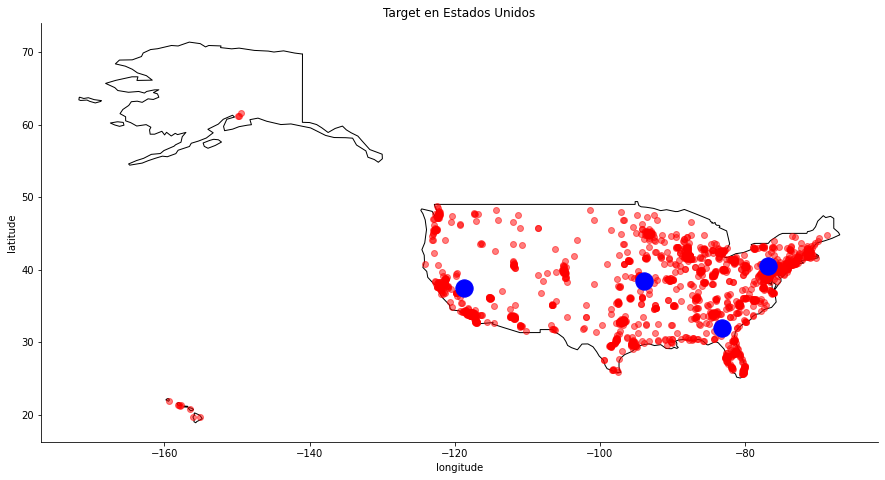

In [25]:
fig, gax = plt.subplots(figsize=(15,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

# Señalando los almacénes como puntos azules.
gdf_C.plot(ax=gax, color='blue', alpha = 1, markersize = 300)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()


# ¿A cuántas tiendas va a surtir?

In [18]:
#Conteo de tiendas por cada cluster
latlong['kmeans'] = kmeans.labels_
latlong.loc[:, 'kmeans'].value_counts()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2    579
3    565
0    382
1    313
Name: kmeans, dtype: int64

De lo anterior, se puede establecer lo siguiente:

* El cluster número 1 atenderá 382 tiendas.
* El cluster número 2 es el que menor cantidad de tiendas atenderá, en este caso 313.
* El cluster número 3 es el que mayor cantidad de tiendas atenderá, en este caso 579.
* El cluster número  4 atenderá 565 tiendas.

# ¿Qué ciudad es?, ¿Sabes a que distancia estará?

In [19]:
from pandas.core.internals.concat import concat_arrays
from geopy.geocoders.yandex import Location
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

Location1 = str(gdf_C[1][0]) + ", " + str(gdf_C[0][0])
Location2 = str(gdf_C[1][1]) + ", " + str(gdf_C[0][1])
Location3 = str(gdf_C[1][2]) + ", " + str(gdf_C[0][2])
Location4 = str(gdf_C[1][3]) + ", " + str(gdf_C[0][3])

geolocator = Nominatim(user_agent="my-application")
Locations = [Location1, Location2, Location3, Location4]
for i in Locations:
  location = geolocator.reverse(i)

  print(location.address)

distancia1 = str(geodesic(Location1, Location2).miles)
print("\nDistancia entre el primer y segundo almacén : ", distancia1, " Millas \n")
distancia2 = str(geodesic(Location2, Location3).miles)
print("Distancia entre el segundo y tercer almacén : ", distancia2, " Millas \n")
distancia3 = str(geodesic(Location3, Location4).miles)
print("Distancia entre el tercer y cuarto almacén : ", distancia3, " Millas \n")

Upper Rock Creek Canyon Trail, Mono County, California, United States
Marble Lane, Dodge County, Georgia, 31001, United States
Northwest 701 Road, Henry County, Missouri, United States
150, James Street, Dauphin County, Pennsylvania, 17023, United States

Distancia entre el primer y segundo almacén :  2040.9916267585013  Millas 

Distancia entre el segundo y tercer almacén :  746.954821791844  Millas 

Distancia entre el tercer y cuarto almacén :  922.7391349659805  Millas 



# Punto 2.

Desarrolla una búsqueda de librerías que ayudan al entendimiento de datos geográficos (minimo enunciar 3 librerías). Además incluye la relevancia de utilizarlas y da su opinión al respecto.


**Cartopy.**

Es un paquete de Python diseñado para el procesamiento de datos geoespaciales con el fin de producir mapas y otros análisis de datos geoespaciales. Hace uso de las potentes librerías PROJ, NumPy y Shapely e incluye una interfaz programática construida sobre Matplotlib para la creación de mapas de calidad de publicación.

Las principales características de cartopy son sus definiciones de proyecciones orientadas a objetos y su capacidad para transformar puntos, líneas, vectores, polígonos e imágenes entre esas proyecciones.

**Geopy.**

Es un cliente Python para varios servicios web de geocodificación populares. Facilita la localización de las coordenadas de direcciones, ciudades, países y puntos de referencia de todo el mundo mediante geocodificadores de terceros y otras fuentes de datos.

**Geopandas.**

Se trata de un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en python. GeoPandas extiende los tipos de datos utilizados por pandas para permitir operaciones espaciales sobre tipos geométricos. Las operaciones geométricas son realizadas por shapely. Geopandas depende además de fiona para el acceso a los archivos y de matplotlib para el trazado.

Su objetivo es facilitar el trabajo con datos geoespaciales en python. Además, permite realizar fácilmente operaciones en python que de otro modo requerirían una base de datos espacial como PostGIS.

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Considero que es importante conocer este tipo de liberías y aprender su uso para poder trabajar con datos geoespaciales (información que describe objetos, eventos u otras características con una ubicación en la superficie de la tierra o cerca de ella). Este tipo de datos suelen combinar información de localización e información de atributos con información temporal. 

*Referencias:*

1. https://scitools.org.uk/cartopy/docs/latest/
2. https://geopy.readthedocs.io/en/stable/
3. https://geopandas.org/en/stable/

